### Logistic Regression
- Logistic regression is mainly used for splitting data into two groups (binary logistic regression), although it can be done on multiple groups (multinomial and ordinal logistic regression).
- It is a supervised model that attempts to fit a sideways S-shaped sigmoid function to the data: $$\frac{1}{1+e^{-x}}$$
- This sigmoid function essentially gives a probability for which group the feature is in.

In [27]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

import datasets.clusters

### Imports
- `sklearn.cluster` is the library used for clustering algorithms from scikit learn
- `matplotlib.pyplot` is the library used for plotting
- `numpy` is used for some computations
- `datasets.clusters` is the library I built to generate classification datasets

In [28]:
dataset_1, labels_1 = datasets.clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0)
dataset_1_var, labels_1v = datasets.clusters.gen_data([[10, 10], [25, 25]], 50, 1, 10, 0.3)

dataset_2, labels_2 = datasets.clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0)
dataset_2_var, labels_2v = datasets.clusters.gen_data([[10, 10], [-10, 10], [-10, -10], [10, -10]], 30, 1, 10, 0.3)

dataset_3, labels_3 = datasets.clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0)
dataset_3_var, labels_3v = datasets.clusters.gen_data([[3, 3], [-3, 3], [-3, -3], [3, -3]], 30, 1, 10, 0.3)

dataset_4, labels_4 = datasets.clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0)
dataset_4_var, labels_4v = datasets.clusters.gen_data([[1, 1], [2, 3], [-1, 2], [3, -2]], 30, 1, 3, 0.3)

### Datasets
- Each dataset has a version with and without variance. Variance essentially allows for outliers.
- For each dataset:
    - `dataset_1` has two clusters that are very separate
    - `dataset_2` has four clusters that don't overlap at all
    - `dataset_3` has four clusters that are close to one another
    - `dataset_4` has four clusters that greatly overlap

In [29]:
def train_and_plot(model: LogisticRegression, dataset: np.ndarray, labels: np.ndarray) -> None:
    model.fit(dataset, labels)

    colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown']
    ax = plt.gca()

    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        points = dataset[labels == label]
        ax.scatter(points[:, 0], points[:, 1], c=colors[i % len(colors)], label=f"Class {label}")

    lim1 = abs(np.max(dataset)) + 1
    lim2 = abs(np.min(dataset)) + 1
    limit = max(lim1, lim2)
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)

    xx, yy = np.meshgrid(np.linspace(-limit, limit, 500), np.linspace(-limit, limit, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)
    preds = np.argmax(probs, axis=1).reshape(xx.shape)

    ax.contourf(xx, yy, preds, alpha=0.2, levels=np.arange(len(unique_labels)+1) - 0.5, colors=colors[:len(unique_labels)])
    ax.contour(xx, yy, preds, levels=np.arange(len(unique_labels)+1) - 0.5, colors='black', linewidths=1, linestyles='--')

    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    ax.legend()
    plt.show()

### Training
- All we need to do is fit the data and then organize it by label.
- After this is done, each label (cluster) is plotted in a different color.
- Support vector classifiers are also plotted.

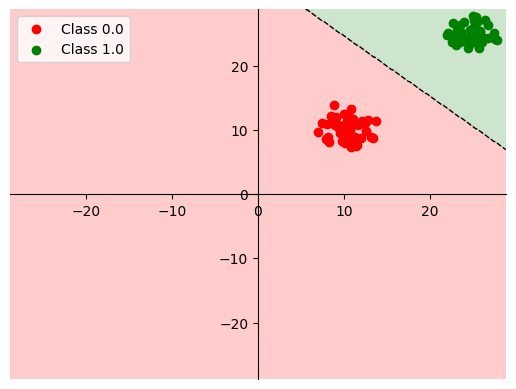

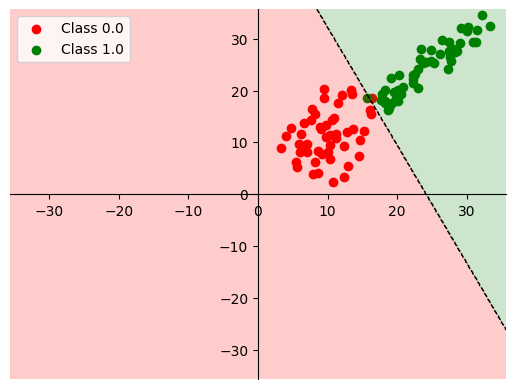

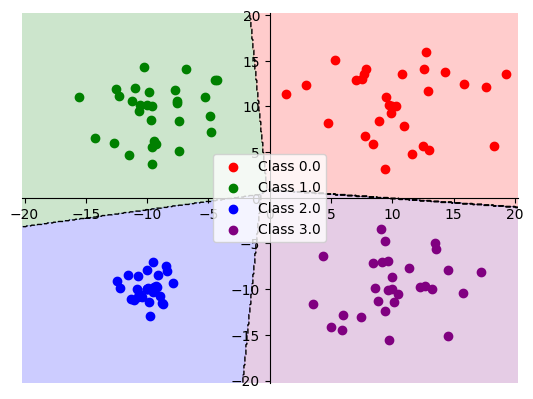

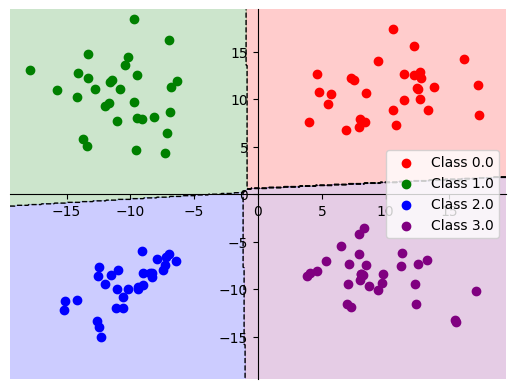

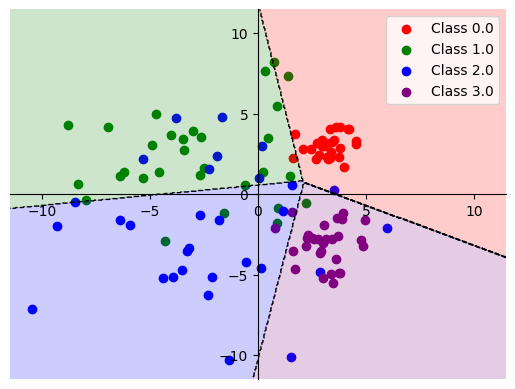

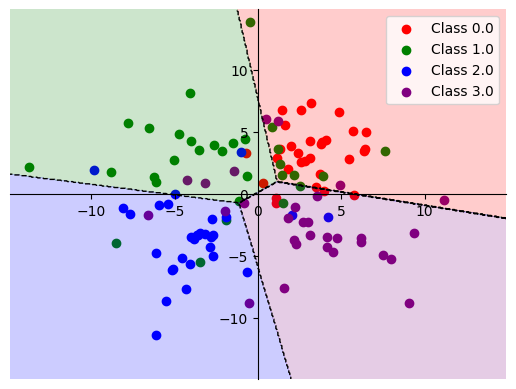

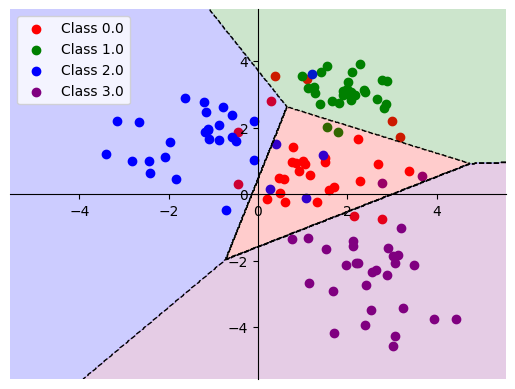

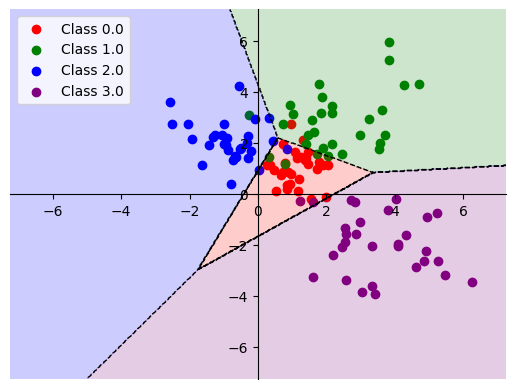

In [30]:
train_and_plot(LogisticRegression(), dataset_1, labels_1)
train_and_plot(LogisticRegression(), dataset_1_var, labels_1v)

train_and_plot(LogisticRegression(), dataset_2, labels_2)
train_and_plot(LogisticRegression(), dataset_2_var, labels_2v)

train_and_plot(LogisticRegression(), dataset_3, labels_3)
train_and_plot(LogisticRegression(), dataset_3_var, labels_3v)

train_and_plot(LogisticRegression(), dataset_4, labels_4)
train_and_plot(LogisticRegression(), dataset_4_var, labels_4v)

### Results
- This algorithm works very well with a wide variety of datasets.
- Despite being best for data with binary labels, the multinomial logistic regression did very well.